### Student Information
Name:黃中慧

Student ID: 109070007

GitHub ID: 114509792

Kaggle name: Chung-Hwei Huang

Kaggle private scoreboard snapshot: 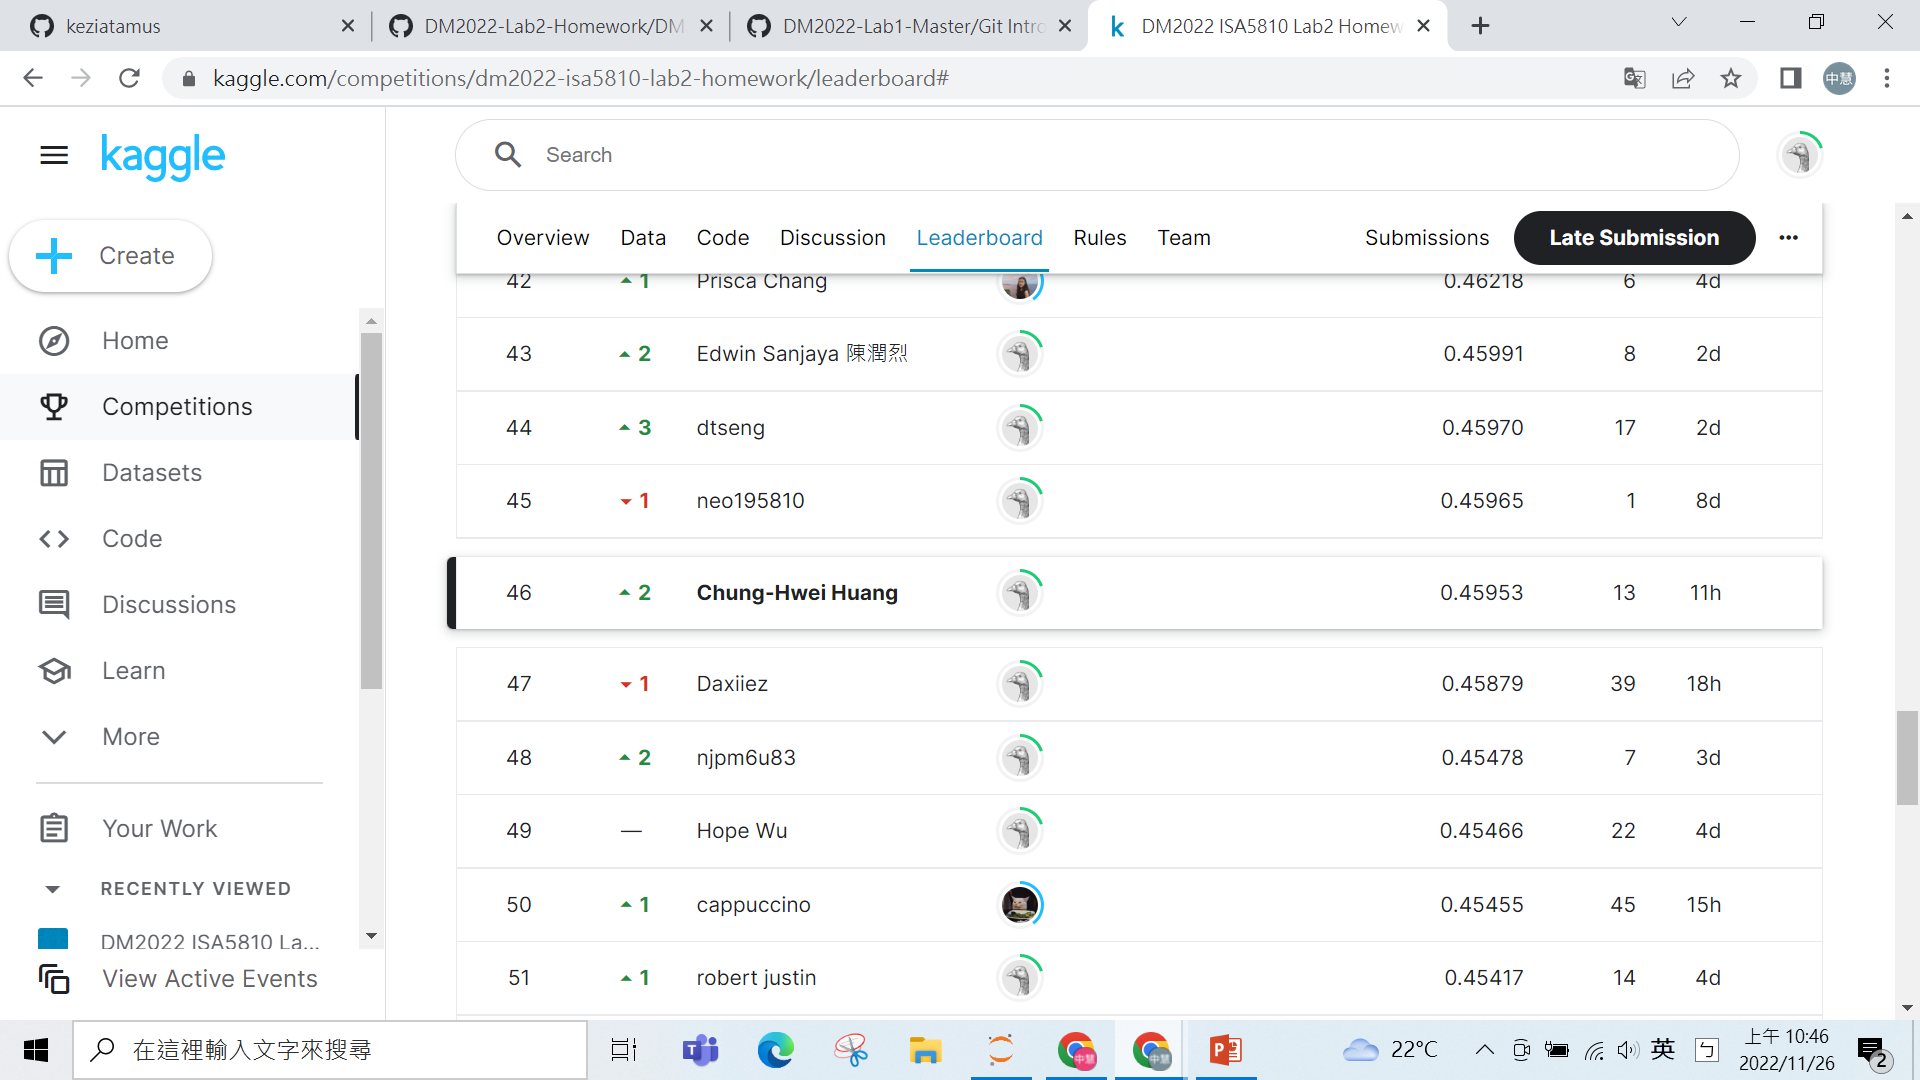

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2022-Lab2-master Repo](https://github.com/keziatamus/DM2022-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm2022-isa5810-lab2-homework) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/2b0d14a829f340bc88d2660dc602d4bd. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Nov. 22th 11:59 pm, Tuesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 25th 11:59 pm, Friday)__. 

# 1. Take home exercises in DM2022-Lab2-master

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [6]:
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)

In [7]:
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


Text(0.5, 1.0, 'Top 30 words of test data')

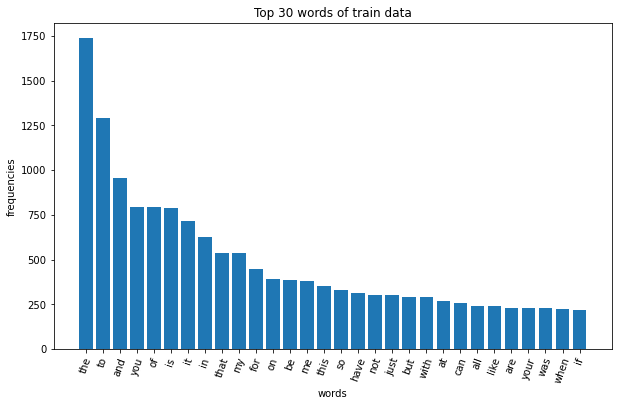

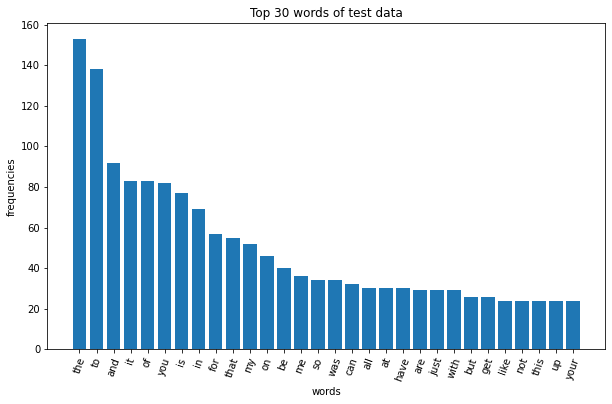

In [8]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
count_vect1 = CountVectorizer()
count_vect2 = CountVectorizer()

train_count = count_vect1.fit_transform(train_df.text)
test_count = count_vect2.fit_transform(test_df.text)

train_wordfreq = np.asarray(train_count.sum(axis=0))[0]
test_wordfreq = np.asarray(test_count.sum(axis=0))[0]

train_rank = sorted([(i, j) for i, j in zip(count_vect1.get_feature_names_out(), train_wordfreq)], key=lambda x: x[1],reverse=True)
test_rank = sorted([(i, j) for i, j in zip(count_vect2.get_feature_names_out(), test_wordfreq)], key=lambda x: x[1],reverse=True)



import matplotlib.pyplot as plt
x=np.arange(30)

fig1 = plt.figure(figsize=(10,6))
plt.bar(x, height=[i[1] for i in train_rank[:30]])
plt.xticks(x, [i[0] for i in train_rank[:30]], rotation=70)
plt.xlabel('words')
plt.ylabel('frequencies')
plt.title('Top 30 words of train data')

fig2 = plt.figure(figsize=(10,6))
plt.bar(x, height=[i[1] for i in test_rank[:30]])
plt.xticks(x, [i[0] for i in test_rank[:30]], rotation=70)
plt.xlabel('words')
plt.ylabel('frequencies')
plt.title('Top 30 words of test data')


In [9]:
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [10]:
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk

BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)  

BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

train_data_BOW_features_500.shape

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

TFIDF_vectorizer1 = TfidfVectorizer(max_features=1000)
train_data_TFIDF_features = TFIDF_vectorizer1.fit_transform(train_df['text'])
train_feature_names = TFIDF_vectorizer1.get_feature_names_out()
print('train_df: ', train_feature_names[100:110])

TFIDF_vectorizer2 = TfidfVectorizer(max_features=1000)
test_data_TFIDF_features = TFIDF_vectorizer2.fit_transform(test_df['text'])
test_feature_names = TFIDF_vectorizer2.get_feature_names_out()
print('test_df: ', test_feature_names[100:110])

train_df:  ['bitter' 'black' 'blacks' 'blame' 'blessed' 'blood' 'bloody' 'blues'
 'body' 'boiling']
test_df:  ['bout' 'box' 'boy' 'brace' 'braved' 'bread' 'breezy' 'brewing' 'brian'
 'brilliant']


---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

### ANS: The result above is the visualization of confusion matrix which is the summary of prediction results on our emotion classification problem. Y-axis are predicted labels and X-axis are True labels. Thus, grids from left top to right bottom, with numbers from 57 to 47 are true positive label,which means that those labels' predicted labels are consistent with their true labels. And for each TP grid, its horizontal grids are false positive, whereas its vertical grids are false negative. As for the color, since the maximum number in this matrix is 76, the threshold is therefore 38 (76/2), and grids with number bigger than 38 will have white font color.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 


In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

TFIDF_vectorizer1 = TfidfVectorizer(max_features=500)
TFIDF_vectorizer2 = TfidfVectorizer(max_features=500)

mul = MultinomialNB()
X_train = TFIDF_vectorizer1.fit_transform(train_df['text'])
y_train = train_df['emotion']

X_test = TFIDF_vectorizer2.fit_transform(test_df['text'])
y_test = test_df['emotion']

mul.fit(X_train, y_train)
y_test_pred = mul.predict(X_test)

acc_train = accuracy_score(y_true=y_test, y_pred=y_test_pred)
print(acc_train)
print(classification_report(y_true=y_test, y_pred=y_test_pred))


0.3025936599423631
              precision    recall  f1-score   support

       anger       0.27      0.32      0.29        84
        fear       0.39      0.44      0.41       110
         joy       0.26      0.18      0.21        79
     sadness       0.23      0.22      0.22        74

    accuracy                           0.30       347
   macro avg       0.29      0.29      0.28       347
weighted avg       0.30      0.30      0.30       347



---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

### ANS: It's apparently that Naive Bayes model results in lower testing accuracy compared to that of Decision Tree model. I think such outcome is mainly because one assumption of the Naive Bayes model is that there are no dependencies amongst attributes. However, attributes of class "emotion" in our data may sometimes dependent to a certain degree, thus class conditional independence is violated and it perform poorly.

In [25]:
import keras
# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [26]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 2880    sadness
2263        joy
1134       fear
2958    sadness
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


In [27]:
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)
output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [28]:
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613, 4)
X_test.shape:  (347, 500)
y_test.shape:  (347, 4)


In [29]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense_3 (Dense)             (None, 64)                32064     
                                                                 
 re_lu_2 (ReLU)              (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_3 (ReLU)              (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 4)                 260       
                                                                 
 softmax_1 (Softmax)         (None, 4)                 0   

In [31]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, # total number of iterate time
                    batch_size=batch_size, # number of sample
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 [==============================] - 0s 3ms/step - loss: 0.9766 - accuracy: 0.6629 - val_loss: 0.9271 - val_accuracy: 0.6398
Epoch 2/25
113/113 [==============================] - 0s 3ms/step - loss: 0.5681 - accuracy: 0.7971 - val_loss: 0.8651 - val_accuracy: 0.6945
Epoch 3/25
113/113 [==============================] - 0s 3ms/step - loss: 0.4201 - accuracy: 0.8428 - val_loss: 0.8089 - val_accuracy: 0.6974
Epoch 4/25
113/113 [==============================] - 0s 3ms/step - loss: 0.3288 - accuracy: 0.8799 - val_loss: 0.8476 - val_accuracy: 0.6830
Epoch 5/25
113/113 [==============================] - 1s 7ms/step - loss: 0.2649 - accuracy: 0.9081 - val_loss: 0.8879 - val_accuracy: 0.6859
Epoch 6/25
113/113 [==============================] - 0s 4ms/step - loss: 0.2176 - accuracy: 0.9269 - val_loss: 0.9285 - val_accuracy: 0.6859
Epoch 7/25
113/113 [==============================] - 0s 3ms/step - loss: 0.1822 - accuracy: 0.9444 - val_loss: 1.0075 - val_accuracy: 0.6744
Epoch 

In [35]:
from sklearn.metrics import accuracy_score
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")


### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

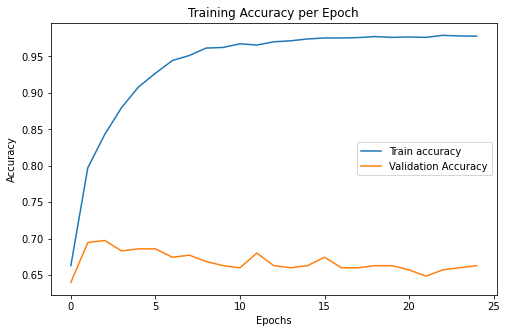

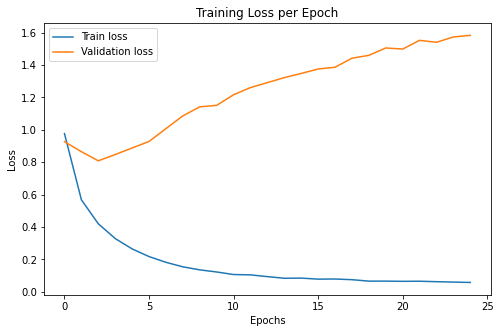

In [36]:
import matplotlib.pyplot as plt
# Training Accuracy per Epoch
x = training_log['epoch']
train_acc = training_log['accuracy']
val_acc = training_log['val_accuracy']

plt.figure(figsize=(8,5))
plt.plot(x, train_acc, label='Train accuracy')
plt.plot(x, val_acc, label='Validation Accuracy')

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy per Epoch")
plt.legend()

# Training Loss per Epoch
x = training_log['epoch']
train_loss = training_log['loss']
val_loss = training_log['val_loss']

plt.figure(figsize=(8,5))
plt.plot(x, train_loss, label='Train loss')
plt.plot(x, val_loss, label='Validation loss')

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss per Epoch")
plt.legend()

# Underfitting: The model is not able to captures either training or new data.
# Overfitting: The model do well on training data yet perform bad on new data.

### As we can see in the chart "Training Loss per Epoch" that validation loss shows a downward trend at the beginning, then turns to increase after the second epoch. Validation loss indicates how well the model fits new data, and the lower the better, therefore this inflection point represents the beginning of overfitting. Same result can also be obtained from the chart "Training Accuracy per Epoch," since after the second epoch, the validation accuracy starts to decline steadily.

In [39]:
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
training_corpus = train_df['text_tokenized'].values

In [40]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


### ANS: We can make word encoding, turn each input into a vector with the dimension of all word and finally construct a sparse matrix, thenuse the sparse matrix as input of the model.

In [42]:
from gensim import models

model_path = "C:/Users/Administrator/Desktop/Data_Mining/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = models.KeyedVectors.load_word2vec_format(model_path, binary=True, limit = 100000)
print('load ok')

load ok


## Because I kept facing error "MemoryError: Unable to allocate 3.35 GiB for an array with shape (3000000, 300) and data type float32" when loading original model, so after asking a TA, I limit the size and just load a portion of it.

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

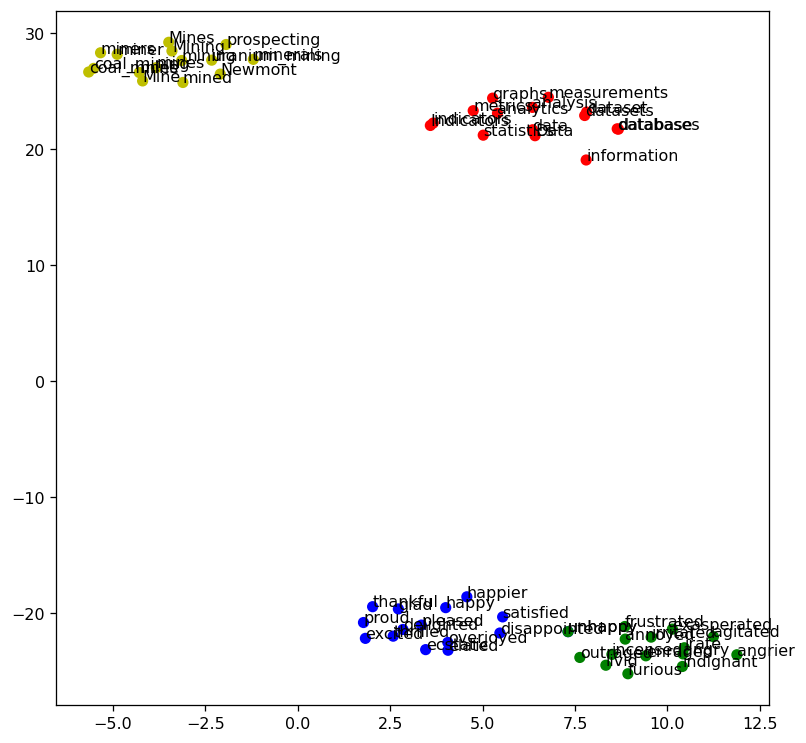

In [43]:
#### Answer here (Want 15*4=60 words in total)
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

word_list = ['happy', 'angry', 'data', 'mining']
topn = 14
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

target_words = happy_words + angry_words + data_words + mining_words

cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn

model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(8, 8), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()